In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.21.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# 全连接层，
# 指定100个神经单元
layer = tf.keras.layers.Dense(100)

# 一般在第一层需要指定输入数据的形状input_shape，后面的层级会自己推导出来
layer = tf.keras.layers.Dense(100,input_shape=(None,2,3))

layer(tf.zeros([10,5]))

<tf.Tensor: id=29, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 

In [3]:
layer.variables
# y = x * w + b
# 输出值中 kernel 相当于w
# bias 就是b

layer.trainable_variables



[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-0.02327979,  0.2379628 ,  0.12837397,  0.07503165, -0.1072125 ,
          0.19697474, -0.2137966 , -0.19234093,  0.05511285, -0.2040418 ,
         -0.12410253,  0.07121684,  0.01454364, -0.11772656,  0.15323152,
          0.19591351,  0.14687581, -0.20825033,  0.01726116,  0.10780112,
          0.18820836,  0.14661743, -0.01899102,  0.09482406, -0.17172846,
          0.08582218, -0.05083902,  0.12545587,  0.13754256, -0.10056314,
         -0.13917157, -0.12375391, -0.22127618, -0.18313792,  0.18602099,
         -0.06369594,  0.03382702,  0.02945308,  0.18943147, -0.12617217,
          0.20277975, -0.18390203, -0.16314372, -0.09663211, -0.02259366,
          0.04392858, -0.19357716, -0.10081282,  0.21432139,  0.0742716 ,
          0.0876276 ,  0.15098359,  0.13232155, -0.0008301 ,  0.10735722,
          0.16555844, -0.0924723 ,  0.15158303,  0.17906828,  0.13971625,
          0.05269043, -0.12591177, -0.0560

In [6]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [7]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)

x_train,x_valid,y_train,y_vaild=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_vaild.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [8]:
# 数据标准化

from sklearn.preprocessing import StandardScaler

saclar = StandardScaler()
x_train_sacled = saclar.fit_transform(x_train)
x_valid_sacled = saclar.transform(x_valid)
x_test_sacled=saclar.transform(x_test)

In [21]:
# 使用lambda自定义layer
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
# tf.nn.softplus : log(1+e^x)

customized_softplus = keras.layers.Lambda(lambda x:tf.nn.softplus(x))
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [22]:
# 使用子类的方式实现自定义的Dense layer
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self,units,activation=None,**kwargs):
        self.units =units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer,self).__init__(**kwargs)
    
    def build(self,input_shape):
        """构建所需要的参数"""
        # x * w + b  input_shape :[None,a] w:[a,b] output_shape:[None,b]        
        self.kernel = self.add_weight(name="kernel",shape=(input_shape[1],self.units),
                                     initializer="uniform",trainable=True)
        
        self.bias =self.add_weight(name="bias",shape=(self.units,),initializer="zeros",trainable=True)
        
        super(CustomizedDenseLayer,self).build(input_shape)
    
    def call(self,x):
        """完整正向计算"""
        return self.activation(x @ self.kernel + self.bias)
    

model = keras.models.Sequential([
 
    CustomizedDenseLayer(30,activation="relu",input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    # customized_softplus跟下面两种写法的是等价的    
    # keras.layers.Dense(1, activation="softplus")，
    # keras.layers.Dense(1),keras.layers.Activation("softplus"),
])

# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 目标函数：均方差，optimizer：随机梯度下降
model.compile(loss="mean_squared_error",optimizer="sgd")
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

In [24]:
history = model.fit(x_train_sacled,y_train,validation_data=(x_valid_sacled,y_vaild),epochs=100,callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 107us/sample - loss: 1.2004 - val_loss: 0.6757
Epoch 2/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5910 - val_loss: 0.5868
Epoch 3/100
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5192 - val_loss: 0.5238
Epoch 4/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0.4767 - val_loss: 0.4859
Epoch 5/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4530 - val_loss: 0.4761
Epoch 6/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4464 - val_loss: 0.4611
Epoch 7/100
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4352 - val_loss: 0.4490
Epoch 8/100
11610/11610 [==============================] - 1s 98us/sample - loss: 0.4257 - val_loss: 0.4555
Epoch 9/100
11610/11610 [==============================] - 1s 94us/sample - loss: 0.41

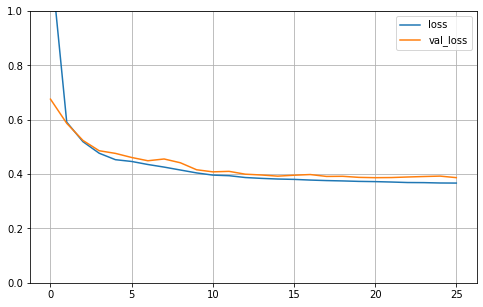

In [25]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [26]:
model.evaluate(x_test_sacled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3873663528945095